<a href="https://colab.research.google.com/github/Lin-Sinorodin/OrientedBoundingBox/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Lin-Sinorodin/OrientedBoundingBox

!mkdir weights
%cd weights
!gdown --id 171xlq49JEiKJ3L-UEV9tICXltPs92dLk
%cd ../

Cloning into 'OrientedBoundingBox'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 105 (delta 25), reused 82 (delta 14), pack-reused 0
Receiving objects: 100% (105/105), 47.90 MiB | 24.61 MiB/s, done.
Resolving deltas: 100% (25/25), done.
/content/weights
Downloading...
From: https://drive.google.com/uc?id=171xlq49JEiKJ3L-UEV9tICXltPs92dLk
To: /content/weights/YOLOv5_DOTAv1.5_OBB.pt
100% 44.9M/44.9M [00:01<00:00, 40.2MB/s]
/content


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from OrientedBoundingBox.code.data import Dataset, plot_obb
from OrientedBoundingBox.code.model import YOLOv5Features

plt.matplotlib.rc('figure', figsize=(10, 10))
%config InlineBackend.figure_format = 'svg'

train_dataset = Dataset(path='OrientedBoundingBox/sample_data/train')
train_data_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)

torch.Size([1, 3, 5502, 3875])
torch.Size([1, 107, 8])
torch.Size([1, 107])


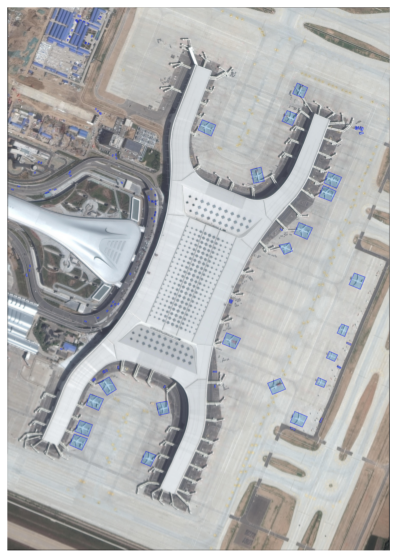

In [3]:
for img, obb, object_class in train_data_loader:
    print(img.shape)
    print(obb.shape)
    print(object_class.shape)

    # show an image with oriented bounding box
    img_show = img.squeeze().permute(1, 2, 0).numpy()
    obb_show = np.int16(obb.squeeze().numpy())
    plot_obb(img_show, obb_show)

    break

# Preview Features

torch.Size([1, 3, 640, 640])


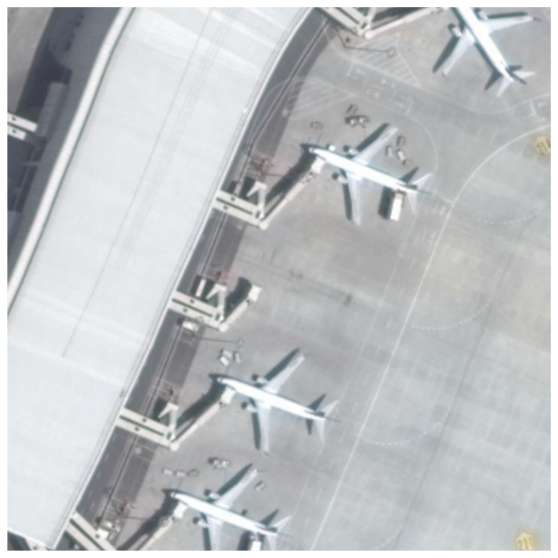

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-10-25 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)



  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 
Model Summary: 316 layers, 22256625 parameters, 0 gradients
Adding AutoShape... 


In [4]:
for img, obb, object_class in train_data_loader:
    img = img[::, ::, 3800:4440, 460:1100]
    print(img.shape)

    img_show = img.squeeze().permute(1, 2, 0).numpy()
    plt.imshow(img_show)
    plt.axis('off')
    plt.show()
    break

img = img.float().cuda()
features = YOLOv5Features()(img)

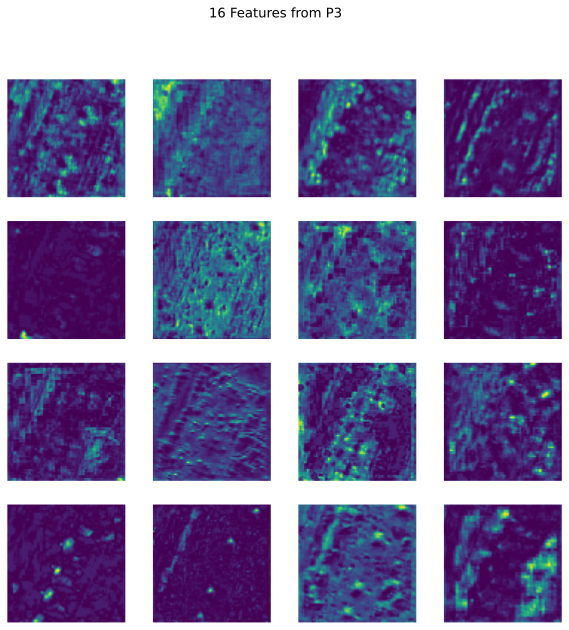

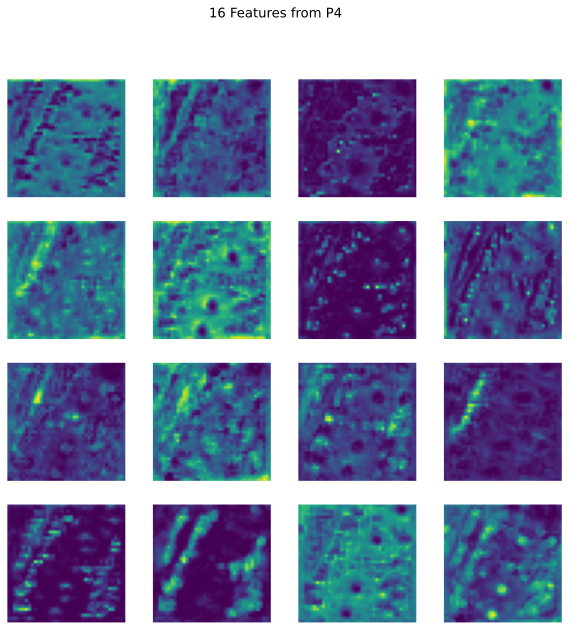

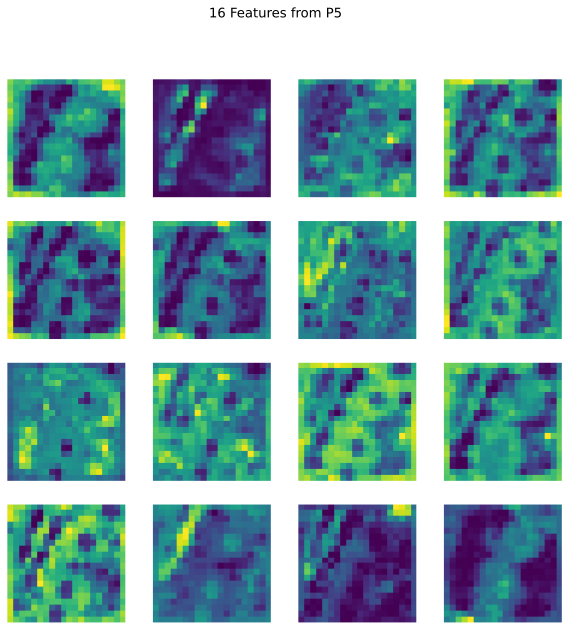

In [7]:
P3 = features[0].squeeze().cpu().detach().numpy()
P4 = features[1].squeeze().cpu().detach().numpy()
P5 = features[2].squeeze().cpu().detach().numpy()


rows, cols = 4, 4

for feature_map, name in zip([P3, P4, P5], ['P3', 'P4', 'P5']):
    plt.figure()
    plt.suptitle(f'{rows*cols} Features from {name}')

    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(feature_map[i])
        plt.axis('off')        

    plt.show()